In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns ; sns.set()

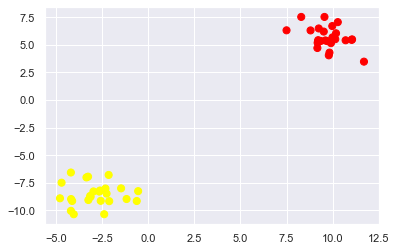

In [16]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=50,centers=2, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y,s=50,cmap='autumn')

n_samples: 표본데이터의 수 ; centers: 생성할 클러스터의 수
cluster_std: 클러스터의 표준 편차
https://datascienceschool.net/view-notebook/ec26c797cec646e295d737c522733b15/

In [18]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1E10) #hard margin (no error) svm
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

변수 C를 사용해서 오분류에 대한 벌칙을 제어할 수 있다.
C가 커진다면, 오분류에 대한 벌칙을 강하게 주고, 작아지면 벌칙 약하게

In [29]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """ Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

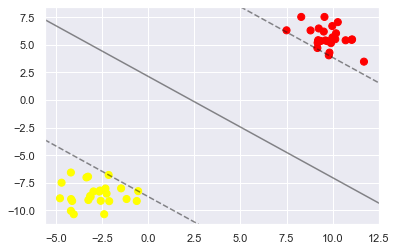

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [22]:
model.support_vectors_

array([[ 9.79106137,  4.05058099],
       [-0.54821744, -8.261272  ],
       [-2.14754366, -6.79243414]])

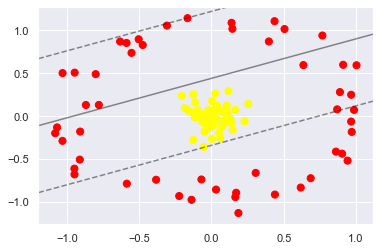

In [36]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

factor :0 < double < 1 (default=.8)
Scale factor between inner and outer circle.

In [37]:
clf = SVC(kernel='rbf', C=1E6) #비선형시 RBF(Radial Basis Function)사용
clf.fit(X, y) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

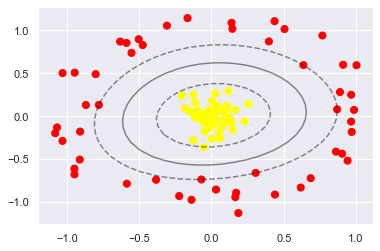

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

HW1

Support Vector Machine(SVM) code in Python
Example: Have a linear SVM kernel

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
#import some data play with
iris=datasets.load_iris()

In [11]:
X=iris.data[:,:2] #we only take the first two features . we could
#avoid this ugly slicing by using a two dim dataset
y=iris.target

In [14]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

gamma=0으로 하면 error로 auto로 바꿈

In [15]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

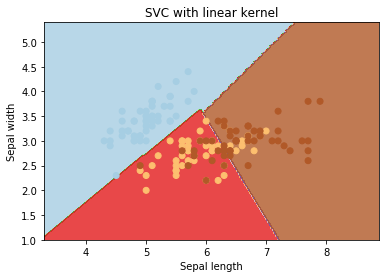

In [18]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [20]:
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)

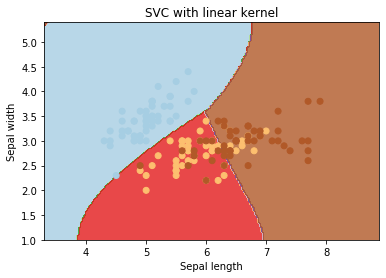

In [21]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

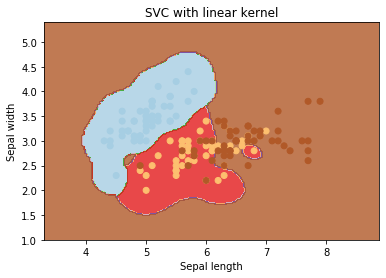

In [30]:
svc = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y) #change C and gamma
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

HW2

In [14]:
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

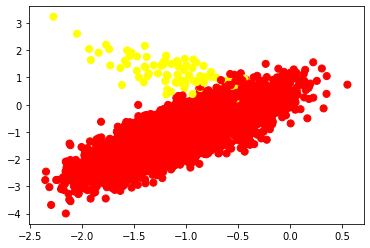

In [9]:
plt.scatter(X[:,0], X[:,1], c=y,s=50,cmap='autumn') #경훈이형 ver

In [6]:
# summarize class distribution
counter = Counter(y)
print(counter)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 100})


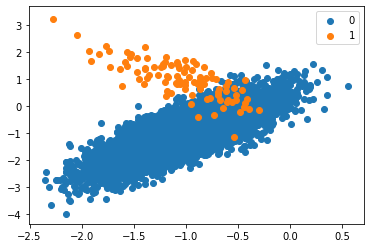

In [18]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [20]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

In [32]:
# define model
model = SVC(gamma='scale')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html

In [23]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [24]:
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.804


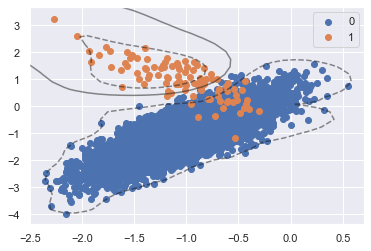

In [38]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

In [44]:
# define model
weights = {0:1.0, 1:100.0}
model = SVC(gamma='scale', class_weight=weights)

# define model
weights = {0:1.0, 1:100.0}
model = SVC(gamma='scale', class_weight=weights)

In [45]:
# define model
model = SVC(gamma='scale', class_weight='balanced')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [47]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [48]:
# summarize performance (정확도 향상)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.964


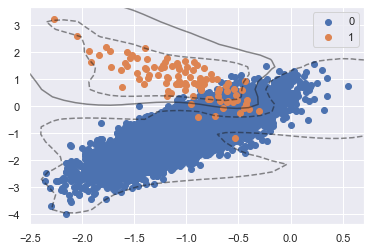

In [49]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

In [50]:
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

In [54]:
from sklearn.model_selection import GridSearchCV
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)

In [55]:
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.966189 using {'class_weight': {0: 1, 1: 100}}
0.745249 (0.129002) with: {'class_weight': {0: 100, 1: 1}}
0.748407 (0.128049) with: {'class_weight': {0: 10, 1: 1}}
0.803727 (0.103536) with: {'class_weight': {0: 1, 1: 1}}
0.932620 (0.059869) with: {'class_weight': {0: 1, 1: 10}}
0.966189 (0.036310) with: {'class_weight': {0: 1, 1: 100}}
